In [126]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats

### Generate the data

In [23]:
def generate_data(mu=5, n=100):
    return scipy.stats.norm(loc=mu).rvs(size=n)

### The estimator

In [79]:
def estimator(data):
    return np.exp(np.mean(data))

For future reference: the true value we seek to estimate.

In [85]:
mu=5
true_value = np.exp(mu)
print(f"The true value is {true_value:.1f}.")

The true value is 148.4.


### Bootstrap replications

In [91]:
def bootstrap_resample(data):
    return random.choices(population=data, k=len(data))

def bootstrap_replications(data=generate_data(mu=5, n=100), estimator=estimator, B=1000):
    return [estimator(bootstrap_resample(data)) for _ in range(B)]

### Automated production of the standard error & Normal confidence interval

In [107]:
def bootstrap_normal_confidence_interval(data=generate_data(mu=5, n=100), estimator=estimator, B=1000, alpha=0.05):
    
    z = scipy.stats.norm.isf(alpha/2)

    estimate = estimator(data=data)

    replicated_data = bootstrap_replications(data=data, estimator=estimator, B=B)
    se_boot_estimate = np.std(replicated_data)

    lower_bound_normal = estimate - z*se_boot_estimate
    upper_bound_normal = estimate + z*se_boot_estimate
    
    return (
        (lower_bound_normal, upper_bound_normal),
        replicated_data
    )

In [122]:
confidence_interval, replicated_data = bootstrap_normal_confidence_interval()
lower_bound, upper_bound = confidence_interval
print(f"A 95% Normal bootstrap confidence interval is: ({lower_bound:.0f}, {upper_bound:.0f}).")

A 95% Normal bootstrap confidence interval is: (112, 169).


### Compare the bootstrap distribution with the true sample distribution of the estimator

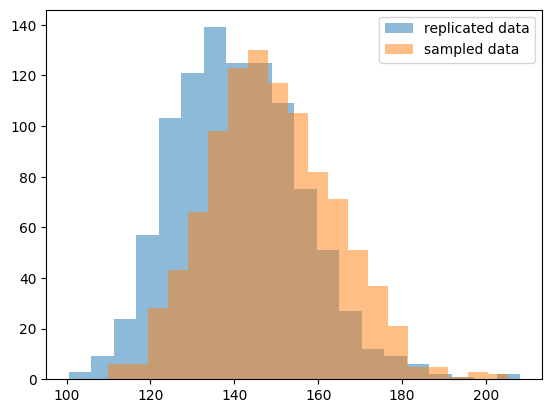

In [190]:
trials = 1000

confidence_interval, replicated_data = bootstrap_normal_confidence_interval(B=trials)
sampled_data = np.array([estimator(generate_data()) for _ in range(trials)])

plt.hist(replicated_data, bins=20, alpha=0.5, label='replicated data')
plt.hist(sampled_data, bins=20, alpha=0.5, label='sampled data')
plt.legend(loc='upper right')
plt.show()